# Lecture 03/10: Introduction to Machine Learning
## Neural Networks
### Neural Network Overview

#### Structure of a Neural Net
A neural net includes several steps, divided into _layers_:
1. Input Layer (no processing, takes in input)
2. Processing with map into output Layer

Data is usually normalized onto the unit interval.

Processing involves applying some (nonlinear) function onto the mapped data:

Linear Mapping: for input $\vec{x}$, can we predict the output $\vec{z}$:

$g(\vec{x})$ is some function applied to the mapping $\mathbb{A}$,

$\vec{z} = \mathbb{A} \cdot \vec{x}$, such that

$\vec{z} = g( \mathbb{A} \cdot \vec{x} )$



#### Choice of mapping $g$
- Mimicing the behavior of "neurons" (taken to be the connections between input and output data), some nonlinear map chooses whether a neuron "fires" and how sensitive that is to the input
- Typical choice: Sigmoid function
$g(p) = \frac{1}{1+e^{-\alpha p}}$, such that $z\in[0,1]$
- Common choice is $\alpha=1$
- There is a narrow range of non-linearity, so we can also pick $\alpha$ such that the inputs fall in the nonlinear range
$\alpha = \frac{10}{n \max{|x_i|}}$


## Implementation
#### Training
- We have $T$ pairs of $(x_k,y_k)$ coordinates that we can use to train our model
- Important: remember that our y-values have to be scaled to (0,1), so they are in the same range that our function $g(p)$ maps to
- Recall that $g$ is a scalar function:
  $g(\mathbb{A}\cdot \vec{x}) = \vec{y}$
  $\implies z_i = g([\mathbb{A}\cdot\vec{x}]_i) = g\left( \sum_j A_{ij} x_j \right)$

- We seek the elements of $\mathbb{A}$
- This can be expressed as a minimization problem, where we alter the matrix elements to achieve this agreement:
- Defining the loss function
$f(A_{ij}) = \left| g(\mathbb{A} x^k) - y^k \right|^2$
- The learning is then perscribed by:
$\vec{x} \leftarrow x - \eta \nabla u$

We have the following example:


In [ ]:
# an example of steepest (gradient) descent minimization

import numpy as np
import matplotlib.pyplot as plt

def rosenbrock(x0, x1, a, b):
    return (a - x0)**2 + b*(x1 - x0**2)**2

def drosdx(x, a, b):
    x0 = x[0]
    x1 = x[1]
    return np.array([-2.0*(a - x0) - 4.0*b*x0*(x1 - x0**2),
                     2.0*b*(x1 - x0**2)])

def inside(x, bounds):
    return ((x > bounds[:,0]) & (x < bounds[:,1])).all()

def main():

    xmin = -2.0
    xmax = 2.0
    ymin = -1.0
    ymax = 3.0

    a = 1.0
    b = 100.0

    N = 256
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)

    x2d, y2d = np.meshgrid(x, y, indexing="ij")

    plt.imshow(np.log10(np.transpose(rosenbrock(x2d, y2d, a, b))), 
               origin="lower",
               extent=[xmin, xmax, ymin, ymax])

    plt.colorbar()
    plt.tight_layout()

    plt.savefig("min_2d_start.png", dpi=150)


    # do descent
    xp = np.array([-1.0, 1.5])
    xp_old = 1000*xp

    eps = 1.e-5

    eta = 0.002


    
    iter = 0
    bounds = np.array([[xmin, xmax], [ymin, ymax]])
    while np.linalg.norm(xp - xp_old) > eps and inside(xp, bounds):
        xp_old[:] = xp[:]

        ### In-class problem: Complete your implementation of steepest descent here
        grad_ = drosdx(xp_old, a, b)
        xp = xp_old - eta * grad_

        iter += 1
        if iter % 500 == 0:
            print(f"Iteration {iter}: Completed")
    
        plt.plot([xp_old[0], xp[0]], [xp_old[1], xp[1]], color="C1")

    plt.scatter([xp[0]], [xp[1]], marker="o", color="C1")    
    if not inside(xp, bounds):
        print(f"Exited because point {xp} exited the allocated bounds {bounds}")
        plt.title("Failed")
    else:
        print(f"Found minimum {xp} in {iter} iterations")
        plt.title("Success")

    plt.savefig(f"min_2d_descent_eta-{eta}.png", dpi=150)

if __name__ == "__main__":
    main()


#### Caveats
- When you minimize with one set of training data, there is no guarantee that you are still minimized with respect to the previous sets
- In practice, you feed the training data multiple times, in random order to the minimizer
- Each pass is called an epoch

#### Neural Net Minimization
We are minimizing the function
$$ f(A_{ij}) = |g(Ax^k) - y^k|^2 $$
such that
$$ (x^k,y^k) = ([x_1^k, x_2^k, \dots, x_n^k], [y_1^k, y_2^k, \dots, y_n^k]) \qquad .$$
Each update would be:
$$ A^{new}_{pq} = A_{pq} - \eta \frac{\partial f}{\partial A_{pq} } $$
so
$$ f(A_{ij}) = \sum_{i=1}^m \left [ g\left(\sum_{j=1}^n A_{ij} x_j \right ) - y_i\right ]^2 $$

The derivative $\frac{\partial f}{\partial A_{ij}}$ is given by 
$$\frac{\partial f}{\partial A_{ij}} = 2(z_p - y_p) \alpha z_p (1-z_p)x_q$$
where $\vec{z} = \mathbb{A}\cdot\vec{x}$ and $\alpha$ is the sigmoid parameter.

## Hidden Layers

The first and last layer are the input and output layers, respectively.\
Any intermediate steps are denoted _Hidden Layers_ in the neural net. Any neural net which has a hidden layer is a _deep_ network.\
Consider a network which has a single hidden layer, the transformation described by the matrix $\mathbb{B}$.\
Then, minimization of the (here, $L^2$) error is done in a backwards order, in practice: this is known as _back-propagation_. The error is given by 
$$ E = \sum (z - y)^2 $$
where $z$ is the prediction and $y$ is the true value.\
The backpropagation technique using gradient descent performs the gradient descent algorithm on $\mathbb{A}$ and $\mathbb{B}$ _separately_. Output error backpropagates to the intermediate, hidden layer, and the hidden layer error backpropagates to the input.

#### In practice
- usually only a single hidden layer is needed
- the number of nodes in each layer is also not normally fixed
- it is common practice to "down-select" to only the most important variables in the hidden layer
- then, usually only a single variable or few sets of variables is necessary to output
- See tensorflow demo online
- Using the loss function as a function of epoch is revealing to the nature of the fit

  #### Neural Net Example

trained matrix: 
[[-0.63309899 -0.39997684 -0.52972595 -0.34768682 -0.25831159 -0.39445251
  -0.6282089  -0.49063745 -0.74369607  4.5650922 ]]
 


ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

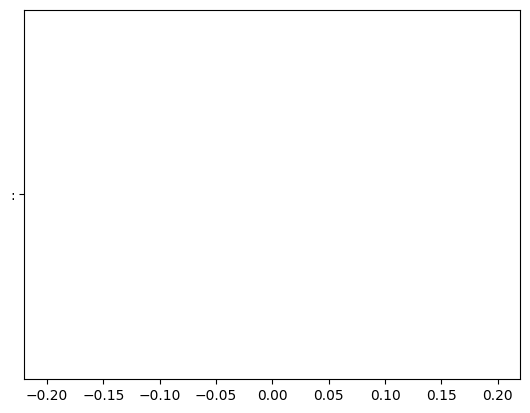

In [1]:
# a neural network example.  We take an input vector of 10 numbers and
# want the net to return simply the last number.

import numpy as np
import random
from scipy import optimize
import matplotlib.pyplot as plt
import sys

# we will restrict the numbers in our sample to be drawn from this set
NUM_SET = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]

class ModelData(object):
    """this is the model data for our "last number" training set.  We
    produce input of length N, drawing from the NUM_SET randomly and
    then we set the output to be simply the last element of the input
    vector

    """
    def __init__(self, N=10):
        self.N = N

        # our model input data
        self.x = np.array([random.choice(NUM_SET) for q in range(self.N)])

        # our scaled model output data
        self.y = np.array([self.x[-1]])

    def round_to_allowed(self, out):
        """take the network output and return the number from the allowed
        sequence we are closest to

        """
        return min(NUM_SET, key=lambda q:abs(q - out))


class NeuralNetwork(object):

    def __init__(self, num_training_unique=100, n_epochs=10,
                 use_alpha=True, eps=1.e-8, eta=0.1):
        self.num_training_unique = num_training_unique
        self.n_epochs = n_epochs
        self.eps = eps
        self.eta = eta

        self.train_set = []
        for _ in range(self.num_training_unique):
            self.train_set.append(ModelData())

        # initialize our matrix with Gaussian normal random numbers
        # we get the size from the length of the input and output
        # Gaussian dist chosen for init because it may lead to faster training
        model = self.train_set[0]
        self.m = len(model.y)
        self.n = len(model.x)

        self.A = np.random.normal(0.0, 1.0/np.sqrt(self.n), (self.m, self.n))

        if use_alpha:
            self.compute_alpha()
        else:
            self.alpha = 1.0

    def compute_alpha(self):
        """figure out a good value for alpha"""
        max_x = -1.0
        for model in self.train_set:
            max_x = max(max_x, np.abs(model.x).max())

        self.alpha = 10.0/(self.n * max_x)

    def g(self, p):
        """our sigmoid function"""
        return 1.0/(1.0 + np.exp(-self.alpha*p))

    def f_minimize(self, A_elements, x, y):
        """ This is the function we want to minimize for training"""
        A = A_elements.reshape((self.m, self.n))
        z = self.g(A @ x)

        return (z - y) @ (z - y)

    def train(self, use_scipy=True):
        """Do the minimization for the training using SciPy's minimization"""

        # train
        for _ in range(self.n_epochs*len(self.train_set)):
            model = random.choice(self.train_set)

            if use_scipy:
                res = optimize.minimize(self.f_minimize, self.A.flatten(),
                                        args=(model.x, model.y), tol=self.eps)

                if not res.success:
                    sys.exit("training optimization failed")

                self.A[:,:] = res.x.reshape((len(model.y), len(model.x)))

            else:
                # gradient descent -- just a single improvement.  eta
                # here is our learning rate

                # make these column vectors
                x = model.x.reshape(self.n, 1)
                y = model.y.reshape(self.m, 1)

                b = self.A @ x
                z = self.g(b)

                self.A[:,:] += -self.eta * 2*self.alpha*(z - y)*z*(1 - z) @ x.T


    def predict(self, model):
        """ predict the outcome using our trained matrix A """
        z = self.g(self.A @ model.x)
        return model.round_to_allowed(z)


def main(use_scipy=True, use_alpha=True, eta=0.1):

    if use_scipy:
        plt_suffix = "_scipy.png"
    else:
        plt_suffix = "_grad_descent.png"

    # length of our input vector
    # initialize neural network
    nn = NeuralNetwork(num_training_unique=100, n_epochs=100, use_alpha=use_alpha, eta=eta)

    # train using class 
    nn.train(use_scipy=use_scipy)

    print("trained matrix: ")
    print(nn.A)
    print(" ")

    # try it out -- first on our original training set data
    err = []
    for model in nn.train_set:
        y_nn = nn.predict(model)
        err.append(float(y_nn - model.x[-1]))

    plt.clf()
    markerline, stemlines, baseline = plt.stem(err, ":", linefmt="C0")
    plt.setp(stemlines, "color", "C0")
    plt.savefig("trained_data" + plt_suffix, dpi=150)

    # now try it out on 100 different new random sequences
    err = []
    npts = 100
    n_right = 0
    for k in range(npts):
        model = ModelData()
        y_nn = nn.predict(model)
        e = float(y_nn - model.x[-1])
        if e == 0:
            n_right += 1
        err.append(e)

    plt.clf()
    markerline, stemlines, baseline = plt.stem(err, ":", linefmt="C0")
    plt.setp(stemlines, "color", "C0")
    plt.savefig("random_data" + plt_suffix, dpi=150)

    return n_right / npts

if __name__ == "__main__":
    #f = main(use_alpha=False)
    #print("frac: {}".format(f))

    f = main(use_scipy=False, use_alpha=False, eta=0.1)
    print("frac: {}".format(f))


### Example: High Signal-to-Noise Ratio
Consider a noisy signal we expect to lie in one of a few discrete frequency bands $f\in\{1,2,3,4\}$.\
The signal is of the form
$$ S = \cos{(2\pi f t)} + 5 r_i $$
where $r_i$ is a random number on the interval $[-1,1]$.

In [ ]:
# a neural network w/ hidden layers example.  We feed in noisy data with one
# of four frequencies and we want the net to return the frequency.

import random

import numpy as np
import matplotlib.pyplot as plt

ALLOWED_FREQS = [1, 2, 3, 4]

class SignalData(object):
    """this is the model data for our frequency training set.  We produce
    a signal (cosine with one of the allowed frequencies) and pollute
    it with noise.  The output is an array with an 1 in the slot
    corresponding to the correct frequency.

    """
    def __init__(self, N=101):
        self.N = N

        self.t = np.linspace(0.0, 1.0, N)

        # frequency
        self.f = random.choice(ALLOWED_FREQS)

        # random numbers in (-1, 1)
        noise = 2.0*np.random.random(N) - 1.0

        # input data
        self.x_orig = np.cos(2.0*np.pi*self.f*self.t)
        self.x = self.x_orig + 5.0*noise

        # output (scaled)
        self.y = np.zeros((len(ALLOWED_FREQS))) + 0.01
        self.y[self.f-1] = 1.0

    def interpret_frequency(self, out):
        """given the output from the neural network, determine which frequency
        was most preferred.

        """
        return ALLOWED_FREQS[np.argmax(out)]

    def plot(self, oname="model.png"):
        """plot the signal data"""
        plt.clf()
        plt.scatter(self.t, self.x, color="C0")
        plt.plot(self.t, self.x_orig, color="C1", ls=":", label="f = {}".format(self.f))
        plt.legend(frameon=False)
        plt.savefig(oname)


class NeuralNetwork(object):
    """A neural network class with a single hidden layer."""

    def __init__(self, num_training_unique=100, n_epochs=10,
                 learning_rate=0.1,
                 hidden_layer_size=100):

        self.num_training_unique = num_training_unique
        self.n_epochs = n_epochs

        self.train_set = []
        for _ in range(self.num_training_unique):
            self.train_set.append(SignalData())

        # learning rate
        self.eta = learning_rate

        # we get the size of the layers from the length of the input
        # and output
        model = self.train_set[0]

        # the number of nodes/neurons on the output layer
        self.m = len(model.y)

        # the number of nodes/neurons on the input layer
        self.n = len(model.x)

        # the number of nodes/neurons on the hidden layer
        self.k = hidden_layer_size

        # we will initialize the weights with Gaussian normal random
        # numbers centered on 0 with a width of 1/sqrt(n), where n is
        # the length of the input state

        # A is the set of weights between the hidden layer and output layer
        self.A = np.random.normal(0.0, 1.0/np.sqrt(self.k), (self.m, self.k))

        # B is the set of weights between the input layer and hidden layer
        self.B = np.random.normal(0.0, 1.0/np.sqrt(self.n), (self.k, self.n))

    def g(self, p):
        """our sigmoid function that operates on the hidden layer"""
        return 1.0/(1.0 + np.exp(-p))

    def train(self):
        """Train the neural network by doing gradient descent with back
        propagation to set the matrix elements in B (the weights
        between the input and hidden layer) and A (the weights between
        the hidden layer and output layer)

        """

        for i in range(self.n_epochs):

            print("epoch {} of {}".format(i+1, self.n_epochs))

            for _ in range(self.num_training_unique):

                model = random.choice(self.train_set)

                x = model.x.reshape(self.n, 1)
                y = model.y.reshape(self.m, 1)

                # take the intermediate layers, apply the sigmoid function
                z_tilde = self.g(self.B @ x)
                z = self.g(self.A @ z_tilde)

                # calculate the errors for each layer
                e = z - y
                e_tilde = self.A.T @ e

                # update matrix A, B with new values based on error
                dA = -2*self.eta * e * z*(1-z) @ z_tilde.T
                dB = -2*self.eta * e_tilde * z_tilde*(1-z_tilde) @ x.T

                # Modify A,B
                self.A[:, :] += dA
                self.B[:, :] += dB

    def predict(self, model):
        """ predict the outcome using our trained matrix A """
        # sigmoid(output to hidden layer * sigmoid(hidden layer to input) )
        y = self.g(self.A @ (self.g(self.B @ model.x)))
        return y

def main(k=2):

    # length of our input vector
    nn = NeuralNetwork(num_training_unique=1000, n_epochs=5, hidden_layer_size=k,
                       learning_rate=0.05)

    # train
    nn.train()

    # try it out -- first on our original training set data
    err = []
    for q, model in enumerate(nn.train_set):
        y_nn = nn.predict(model)
        err.append(abs(model.interpret_frequency(y_nn) - model.f))
        if q == 0:
            model.plot()

    plt.clf()
    markerline, stemlines, baseline = plt.stem(err, ":", linefmt="C0")
    plt.setp(stemlines, "color", "C0")
    plt.savefig("trained_data_{}.png".format(k), dpi=150)


    plt.clf()
    bins = list(range(5))
    plt.hist(err, bins=bins)
    #bins_labels(bins)
    plt.savefig("trained_hist_{}.png".format(k), dpi=150)

    # now try it out on 100 different new random sequences
    err = []
    for _ in range(100):
        model = SignalData()
        y_nn = nn.predict(model)
        err.append(abs(model.interpret_frequency(y_nn) - model.f))

    plt.clf()
    markerline, stemlines, baseline = plt.stem(err, ":", linefmt="C0")
    plt.setp(stemlines, "color", "C0")
    plt.savefig("random_data_{}.png".format(k), dpi=150)

    plt.clf()
    plt.hist(err, bins=bins)
    #bins_labels(bins)
    plt.savefig("random_hist_{}.png".format(k), dpi=150)


def bins_labels(bins, **kwargs):
    """pretty histogram bin labels from
    https://stackoverflow.com/questions/23246125/how-to-center-labels-in-histogram-plot"""
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])

if __name__ == "__main__":
    for hidden_size in [1, 2, 4, 8, 16, 32, 64]:
        main(k=hidden_size)


#### Result: Maybe Neural Nets aren't always the best
- a simple method of taking the FFT and returning signal with max power outperforms NN
- However, there are caveats (see lecture slides)

## Deep Learning (After Spring Break)
- Any network with many (nowadays, 100s of) hidden layers
- Free textbooks available on canvas
  